In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [112]:
df = pd.read_csv('../data/17_5_18_T7_mRFP_NLS.CSV', skiprows=6)
print df.shape
gain_diff = df.shape[0] / 5
times = df["Unnamed: 1"]
df.drop('Unnamed: 1', inplace=True, axis=1)
# Bad data
df.drop(['E09', 'F04', 'F05'], inplace=True, axis=1)
df.head()

(1591, 38)


,Well,B02,B03,B04,B05,B06,B07,B08,B09,C02,...,D09,E02,E03,E04,E05,E06,E07,E08,F02,F03
0,Raw Data (570-20/630-40 4),586.0,266.0,620.0,628.0,725.0,616.0,735.0,570.0,637.0,...,633.0,509.0,614.0,354.0,538.0,720.0,291.0,522.0,421.0,531.0
1,Raw Data (570-20/630-40 4),633.0,245.0,625.0,653.0,749.0,614.0,717.0,582.0,647.0,...,630.0,529.0,631.0,342.0,552.0,714.0,310.0,491.0,418.0,539.0
2,Raw Data (570-20/630-40 4),614.0,268.0,646.0,629.0,742.0,616.0,737.0,559.0,642.0,...,625.0,550.0,626.0,354.0,570.0,712.0,313.0,531.0,431.0,532.0
3,Raw Data (570-20/630-40 4),647.0,310.0,701.0,642.0,801.0,698.0,815.0,606.0,640.0,...,642.0,513.0,628.0,343.0,610.0,700.0,362.0,535.0,436.0,503.0
4,Raw Data (570-20/630-40 4),611.0,294.0,689.0,683.0,794.0,677.0,798.0,663.0,667.0,...,650.0,493.0,615.0,316.0,583.0,677.0,334.0,533.0,427.0,539.0


In [104]:
gain2 = gain_diff
outs = df[gain2:gain2+gain_diff - 1].mean(axis=0)
outs_norm = outs / outs.max()
#print outs_norm
sor_args = outs_norm.argsort()
outs_norm[sor_args]

E04    0.085193
E02    0.093184
E03    0.115421
D06    0.116109
C05    0.130016
E05    0.132131
C04    0.132139
D08    0.134117
D07    0.136651
F05    0.151797
D09    0.157174
F03    0.172068
D04    0.195206
E07    0.208654
C06    0.261288
C07    0.275806
D05    0.284882
E06    0.287743
B05    0.288327
B08    0.288509
B03    0.292764
E08    0.306562
B06    0.309608
F02    0.322549
B04    0.407425
B02    0.459537
B07    0.473834
C02    0.500381
C03    0.506648
D02    0.585700
C08    0.641366
C09    0.687010
D03    0.688178
B09    1.000000
dtype: float64

0


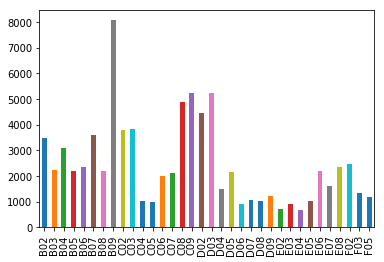

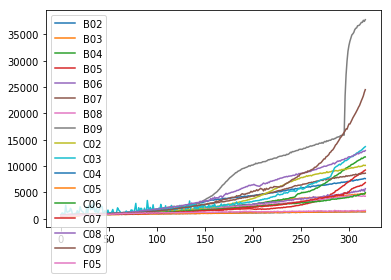

318


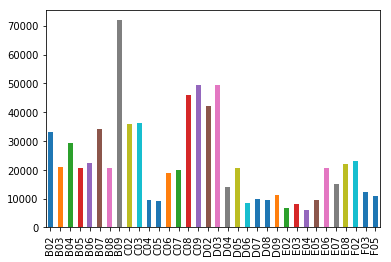

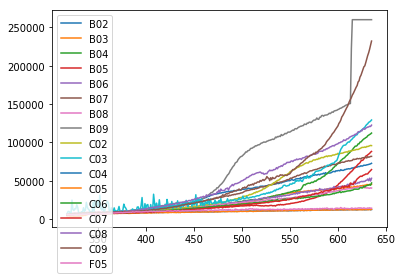

636


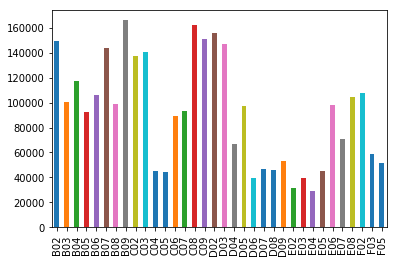

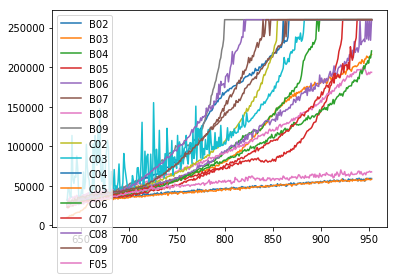

954


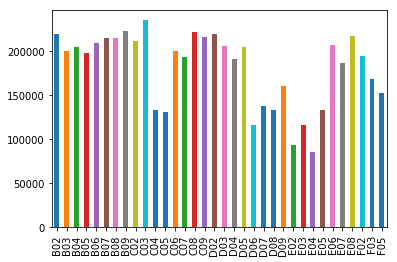

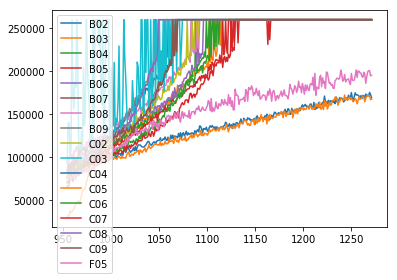

1272


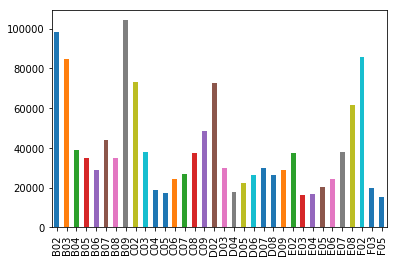

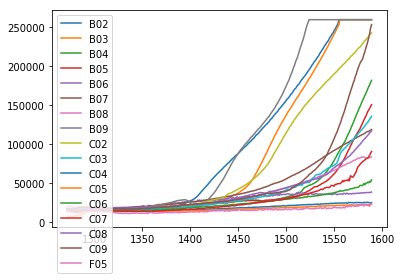

In [107]:
for i in range(0, df.shape[0] - 1, gain_diff):
    print i
    #df.iloc[gain_diff][1:].plot(kind='bar')
    df[i:i+gain_diff - 1].mean(axis=0).plot(kind='bar')
    df.loc[i:i+gain_diff - 1, 'B02':'C09'].plot()
    df.loc[i:i+gain_diff - 1, 'F05'].plot()
    plt.legend(loc='upper left')
    plt.show()


In [116]:
conds = pd.read_csv('../data/17_5_18_exp_conditions.csv')
conds.drop(conds.shape[0] - 1, inplace=True)
conds_full = conds.reindex(np.repeat(conds.index.values, 2)).reset_index()
conds_full = conds_full.drop(32).reset_index()
print conds_full.shape, outs_norm.shape
conds_full['OUT'] = outs_norm.reset_index(drop=True)
conds_avg = conds_full.groupby('index').mean()
conds_avg.to_csv('../data/17_5_18_EXPERIMENT.csv')
conds_avg

(33, 6) (34,)


,level_0,MDX,HMP,NT,K,OUT
index,,,,,,
0,0.5,0.00,0.00,1.00,0.00,0.376151
1,2.5,0.00,1.00,0.00,0.00,0.347876
2,4.5,1.00,0.00,0.00,0.00,0.391721
3,6.5,0.00,0.50,0.50,0.00,0.644255
4,8.5,0.50,0.00,0.50,0.00,0.503514
5,10.5,0.50,0.50,0.00,0.00,0.131077
6,12.5,0.25,0.25,0.50,0.00,0.268547
7,14.5,0.25,0.50,0.25,0.00,0.664188
8,16.5,0.50,0.25,0.25,0.00,0.636939
